In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import os

In [2]:
import kagglehub

if os.path.exists("/home/abhay/.cache/kagglehub/datasets/salvatorerastelli/spotify-and-youtube/versions/2"):
    path = "/home/abhay/.cache/kagglehub/datasets/salvatorerastelli/spotify-and-youtube/versions/2"
else:
    path = kagglehub.dataset_download("salvatorerastelli/spotify-and-youtube")

print("Path to dataset files:", path)

Path to dataset files: /home/abhay/.cache/kagglehub/datasets/salvatorerastelli/spotify-and-youtube/versions/2


/home/abhay/Documents/Repo/abhayma1000/DS-MA4635Final/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
all_data = pd.read_csv(path + "/Spotify_Youtube.csv")

In [4]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(all_data, test_size=0.2, random_state=42)
train, val = train_test_split(train, test_size=0.2, random_state=42)


In [5]:
train.head()

Unnamed: 0         Artist  \
6645         6645            ATB   
5075         5075  Grateful Dead   
18072       18072        Cardi B   
19670       19670  Natanael Cano   
18601       18601    Central Cee   

                                             Url_spotify  \
6645   https://open.spotify.com/artist/7jZM5w05mGhw6w...   
5075   https://open.spotify.com/artist/4TMHGUX5WI7OOm...   
18072  https://open.spotify.com/artist/4kYSro6naA4h99...   
19670  https://open.spotify.com/artist/0elWFr7TW8piil...   
18601  https://open.spotify.com/artist/5H4yInM5zmHqpK...   

                                Track                            Album  \
6645                          Ecstasy                       No Silence   
5075           Ripple - 2013 Remaster  American Beauty (2013 Remaster)   
18072  Hot Shit (feat. Ye & Lil Durk)   Hot Shit (feat. Ye & Lil Durk)   
19670                   Y Si Me Miran                    Y Si Me Miran   
18601               Obsessed With You                               23   

      Album_type                                   Uri  Danceability  Energy  \
6645       album  spotify:track:0wYVNC09iLBVIqHB07Hckt         0.658   0.878   
5075       album  spotify:track:1OE5l6sedVcIFELMuxQOPI         0.604   0.411   
18072     single  spotify:track:3uJFmluXzYedoJcvhpC1AW         0.878   0.685   
19670     single  spotify:track:1WHml9IbQkFUtVz8ZXEkUb         0.603   0.671   
18601      album  spotify:track:4oxGI8yyghLuMV7ybRG3kg         0.746   0.825   

       Key  ...                                  Url_youtube  \
6645   8.0  ...  https://www.youtube.com/watch?v=xFhZSo0dbao   
5075   7.0  ...  https://www.youtube.com/watch?v=QmMjY6tXaEo   
18072  9.0  ...  https://www.youtube.com/watch?v=vjbBaai9ZA8   
19670  5.0  ...  https://www.youtube.com/watch?v=twuNvASn3ko   
18601  3.0  ...  https://www.youtube.com/watch?v=oP7KHC129RQ   

                                                   Title        Channel  \
6645                   ATB - Ecstasy (Official Video HD)      Kontor.TV   
5075       Grateful Dead - Ripple (Official Music Video)  Grateful Dead   
18072  Cardi B - Hot Shit feat. Kanye West & Lil Durk...        Cardi B   
19670  Natanael Cano x Luis R Conriquez x Gabito Ball...  Natanael Cano   
18601   Central Cee - Obsessed With You (Official Video)    Central Cee   

            Views      Likes  Comments  \
6645   20938295.0   113724.0    4228.0   
5075    2731028.0    35689.0    1791.0   
18072  23981521.0   497970.0   32185.0   
19670  14629110.0   128314.0    1588.0   
18601  82354366.0  1233455.0   12223.0   

                                             Description  Licensed  \
6645   Make sure to check out ATB's brandnew album „n...      True   
5075   The Grateful Dead’s “Ripple” became a kind of ...      True   
18072  Cardi B - Hot Shit feat. Kanye West & Lil Durk...      True   
19670  Natanael Cano x Luis R Conriquez x Gabito Ball...     False   
18601  Stream Obsessed With You: https://ada.lnk.to/O...      True   

      official_video       Stream  
6645            True   30266063.0  
5075            True   60606116.0  
18072           True   68777995.0  
19670           True   14844076.0  
18601           True  213944257.0  

[5 rows x 28 columns]

In [6]:
train.columns

Index(['Unnamed: 0', 'Artist', 'Url_spotify', 'Track', 'Album', 'Album_type',
       'Uri', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

In [7]:
number_columns = ['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Views', 'Likes', 'Comments', 'Stream']

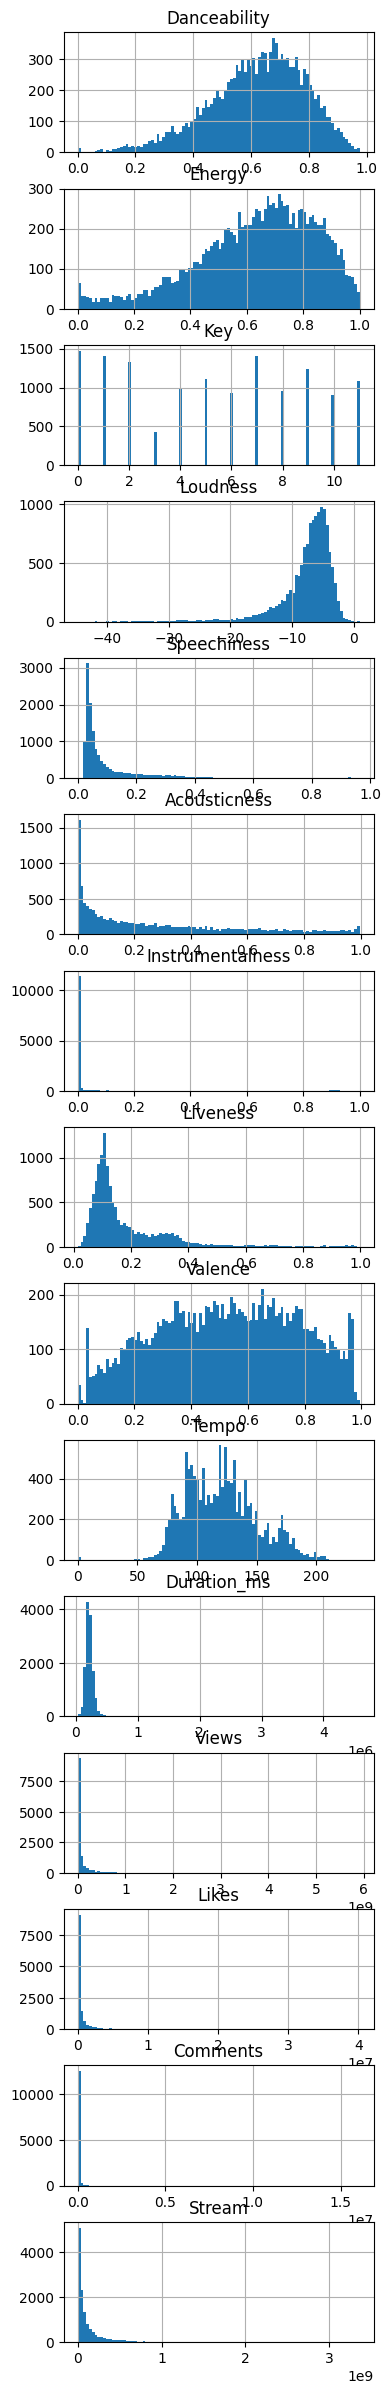

In [8]:
fig, axes = plt.subplots(len(number_columns), 1, figsize=(4, 30))

for i, col in enumerate(number_columns):
    train.hist(ax=axes[i], column=col, bins=100)

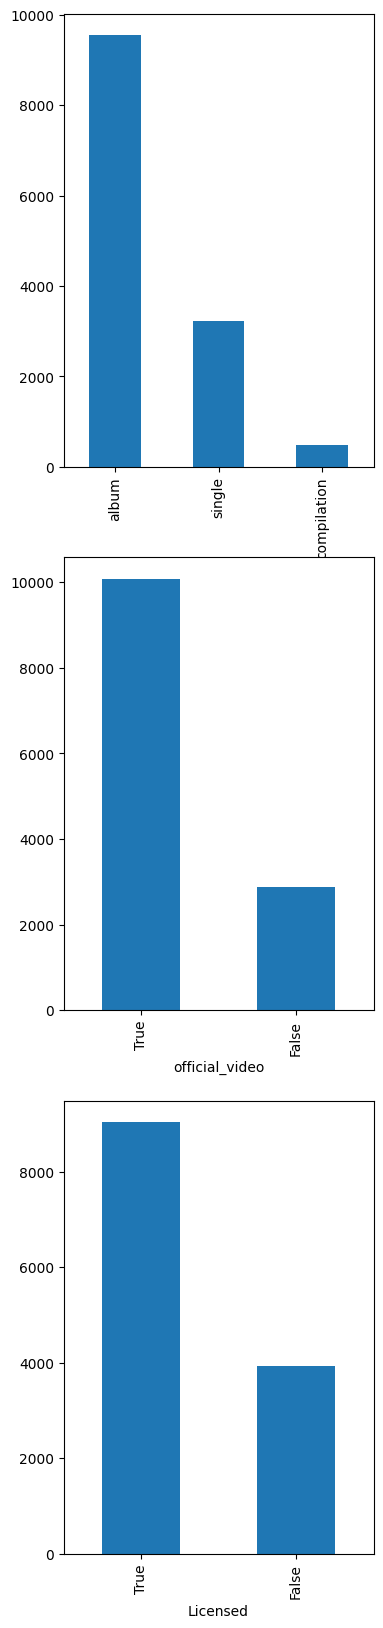

In [9]:
categorical_columns = ['Album_type', 'official_video', 'Licensed']

fig, axes = plt.subplots(len(categorical_columns), 1, figsize=(4, 20))

for i, col in enumerate(categorical_columns):
    train[col].value_counts().plot(ax=axes[i], kind='bar')

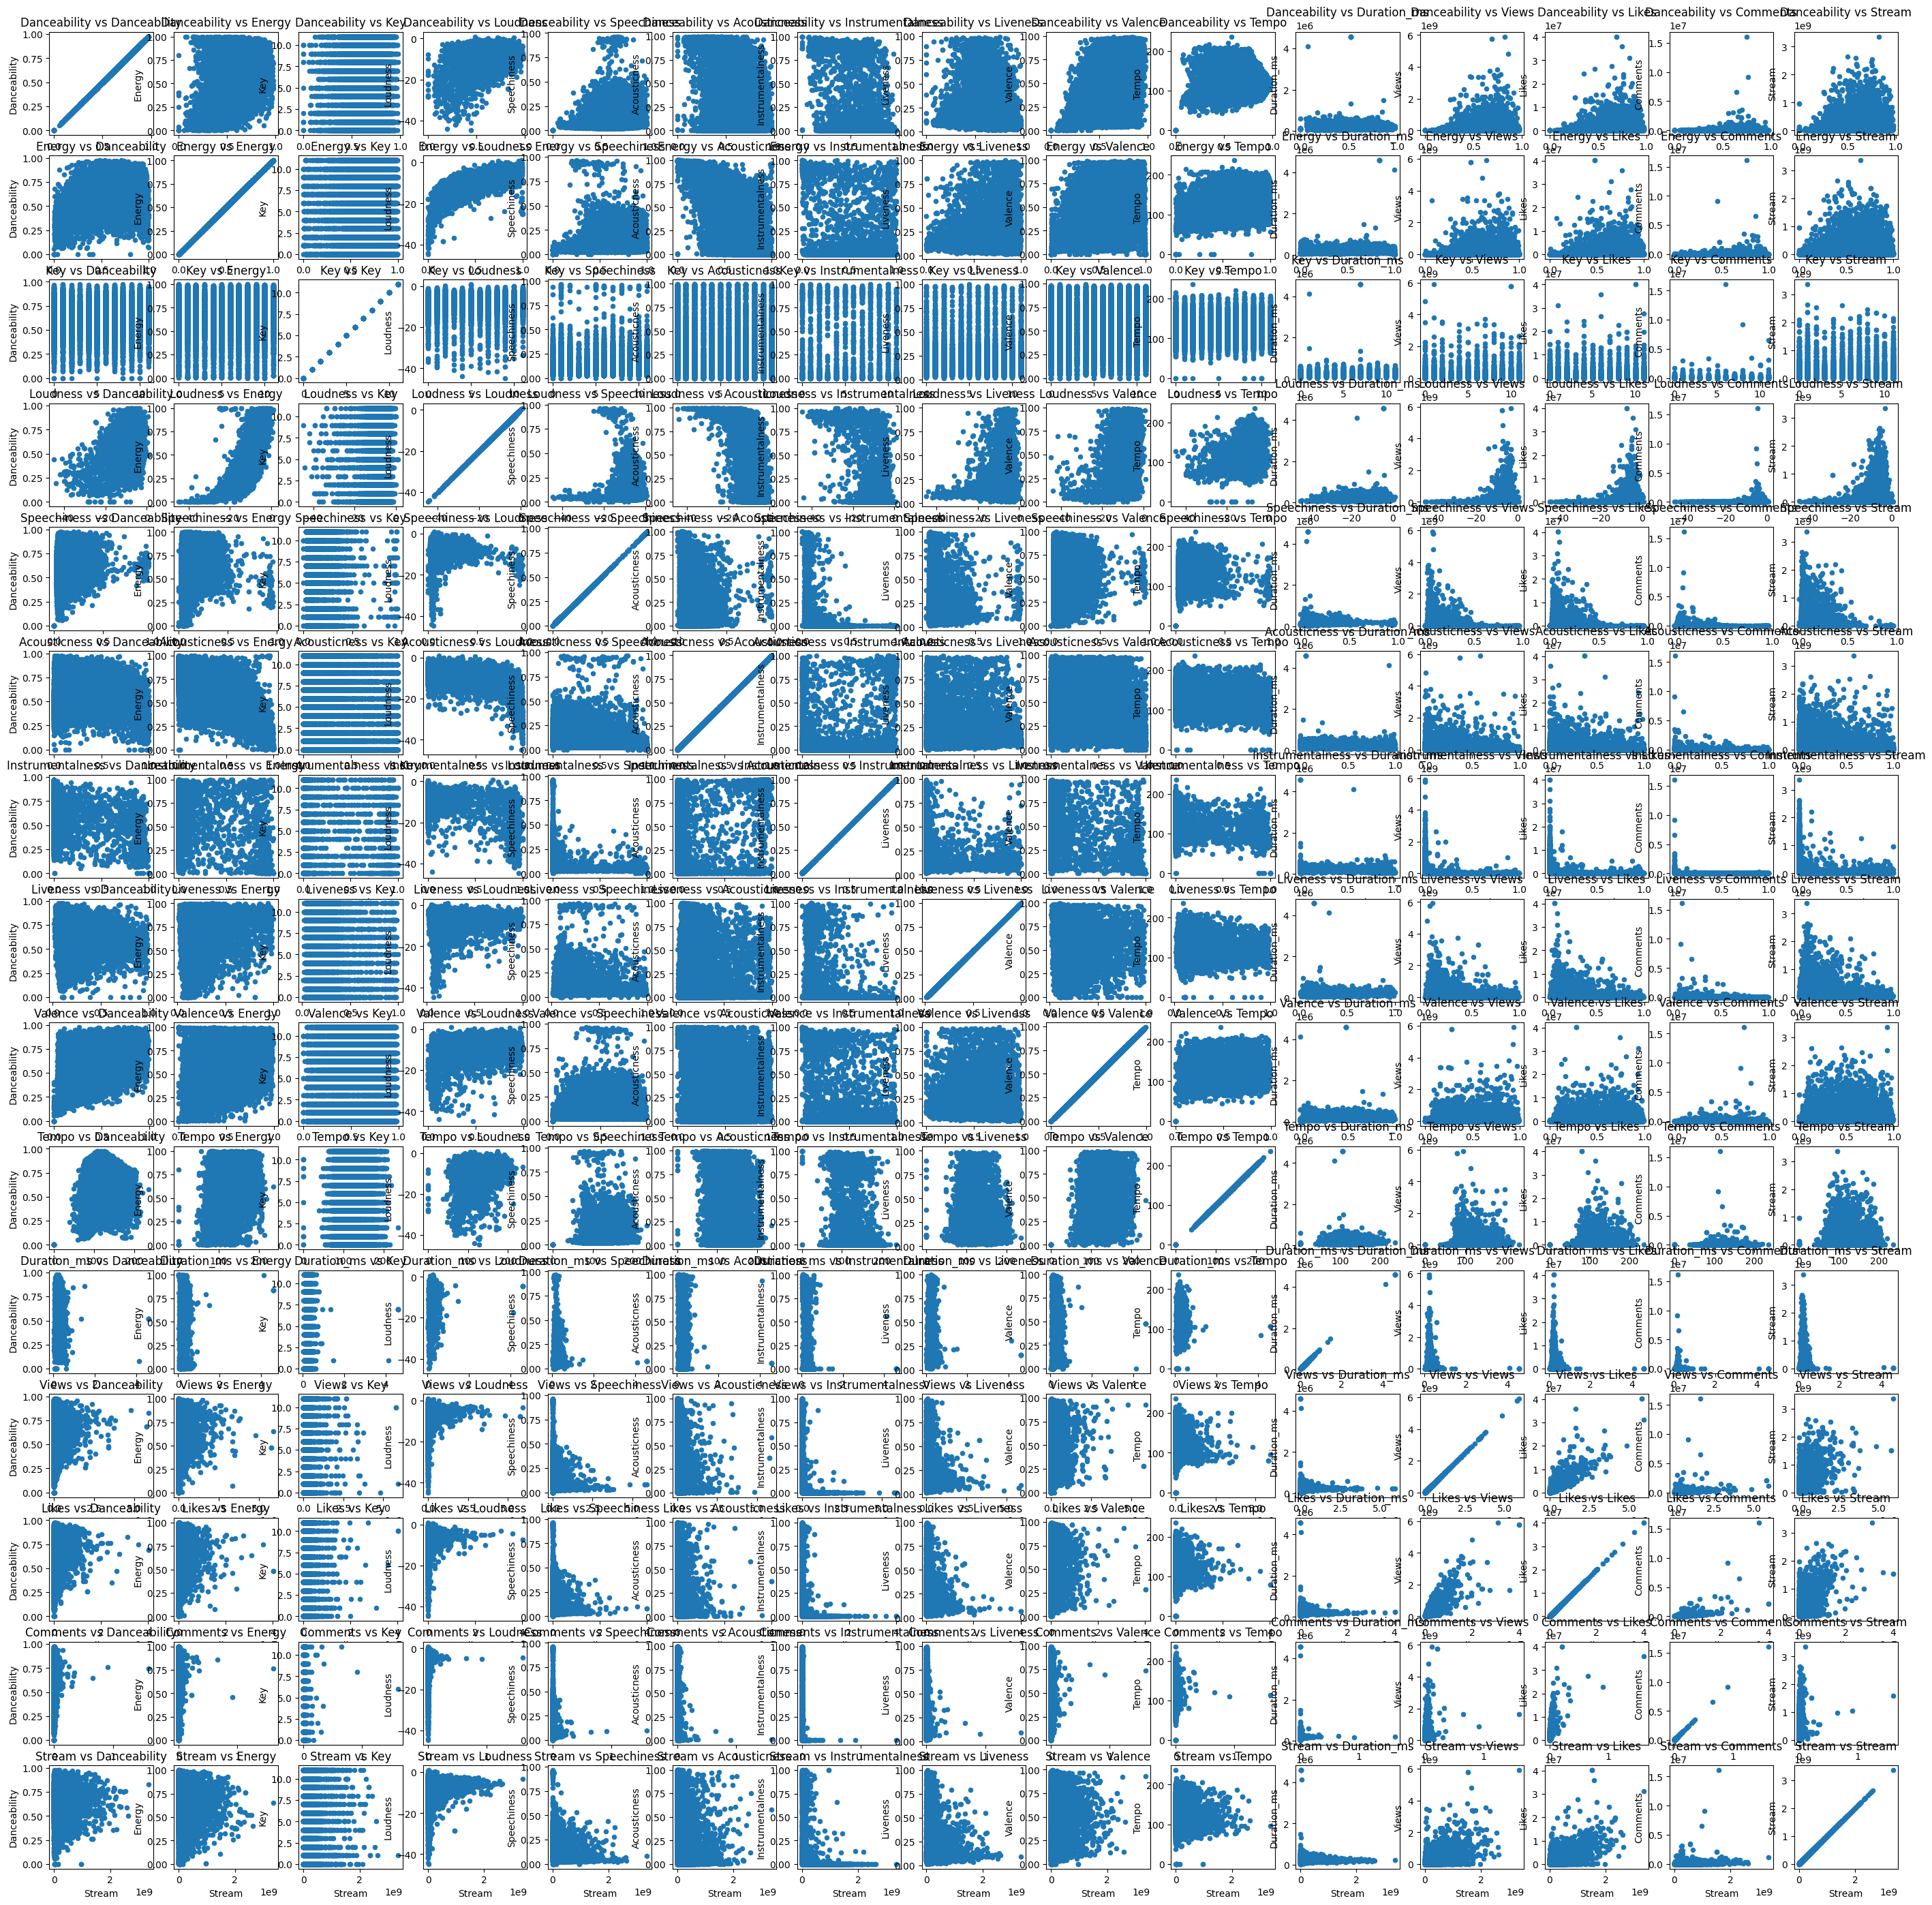

In [10]:
fig, axes = plt.subplots(len(number_columns), len(number_columns), figsize=(35, 35))

for i, col in enumerate(number_columns):
    for i2, col2 in enumerate(number_columns):
        train.plot(ax=axes[i, i2], x=col, y=col2, kind='scatter', title=f'{col} vs {col2}')
        axes[i, i2].set_xlabel(col)
        axes[i, i2].set_ylabel(col2)


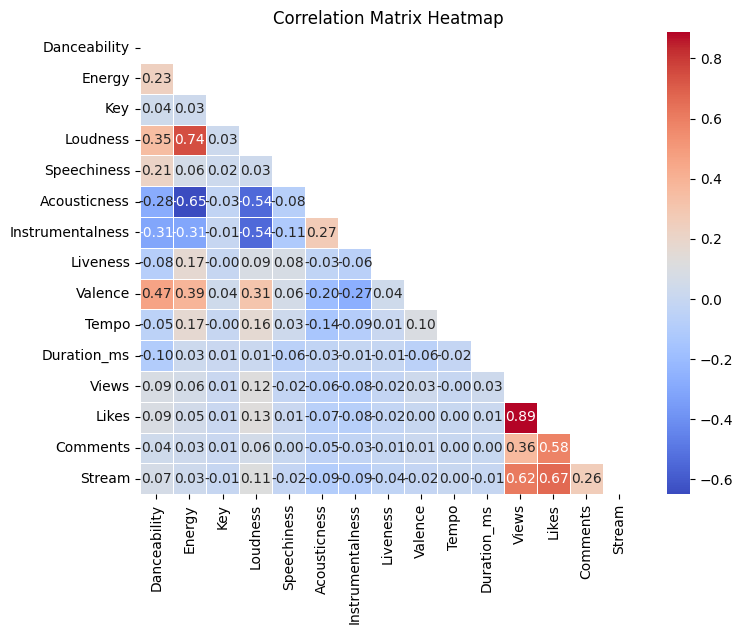

In [11]:
import seaborn as sns

corr_matrix = train[number_columns].corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, mask=mask)
plt.title('Correlation Matrix Heatmap')
plt.show()

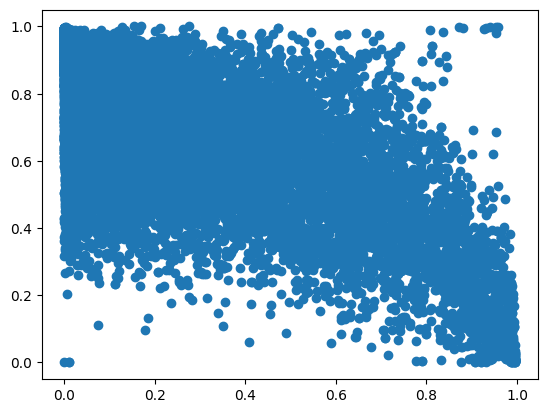

In [12]:
plt.scatter(train['Acousticness'], train['Energy'])

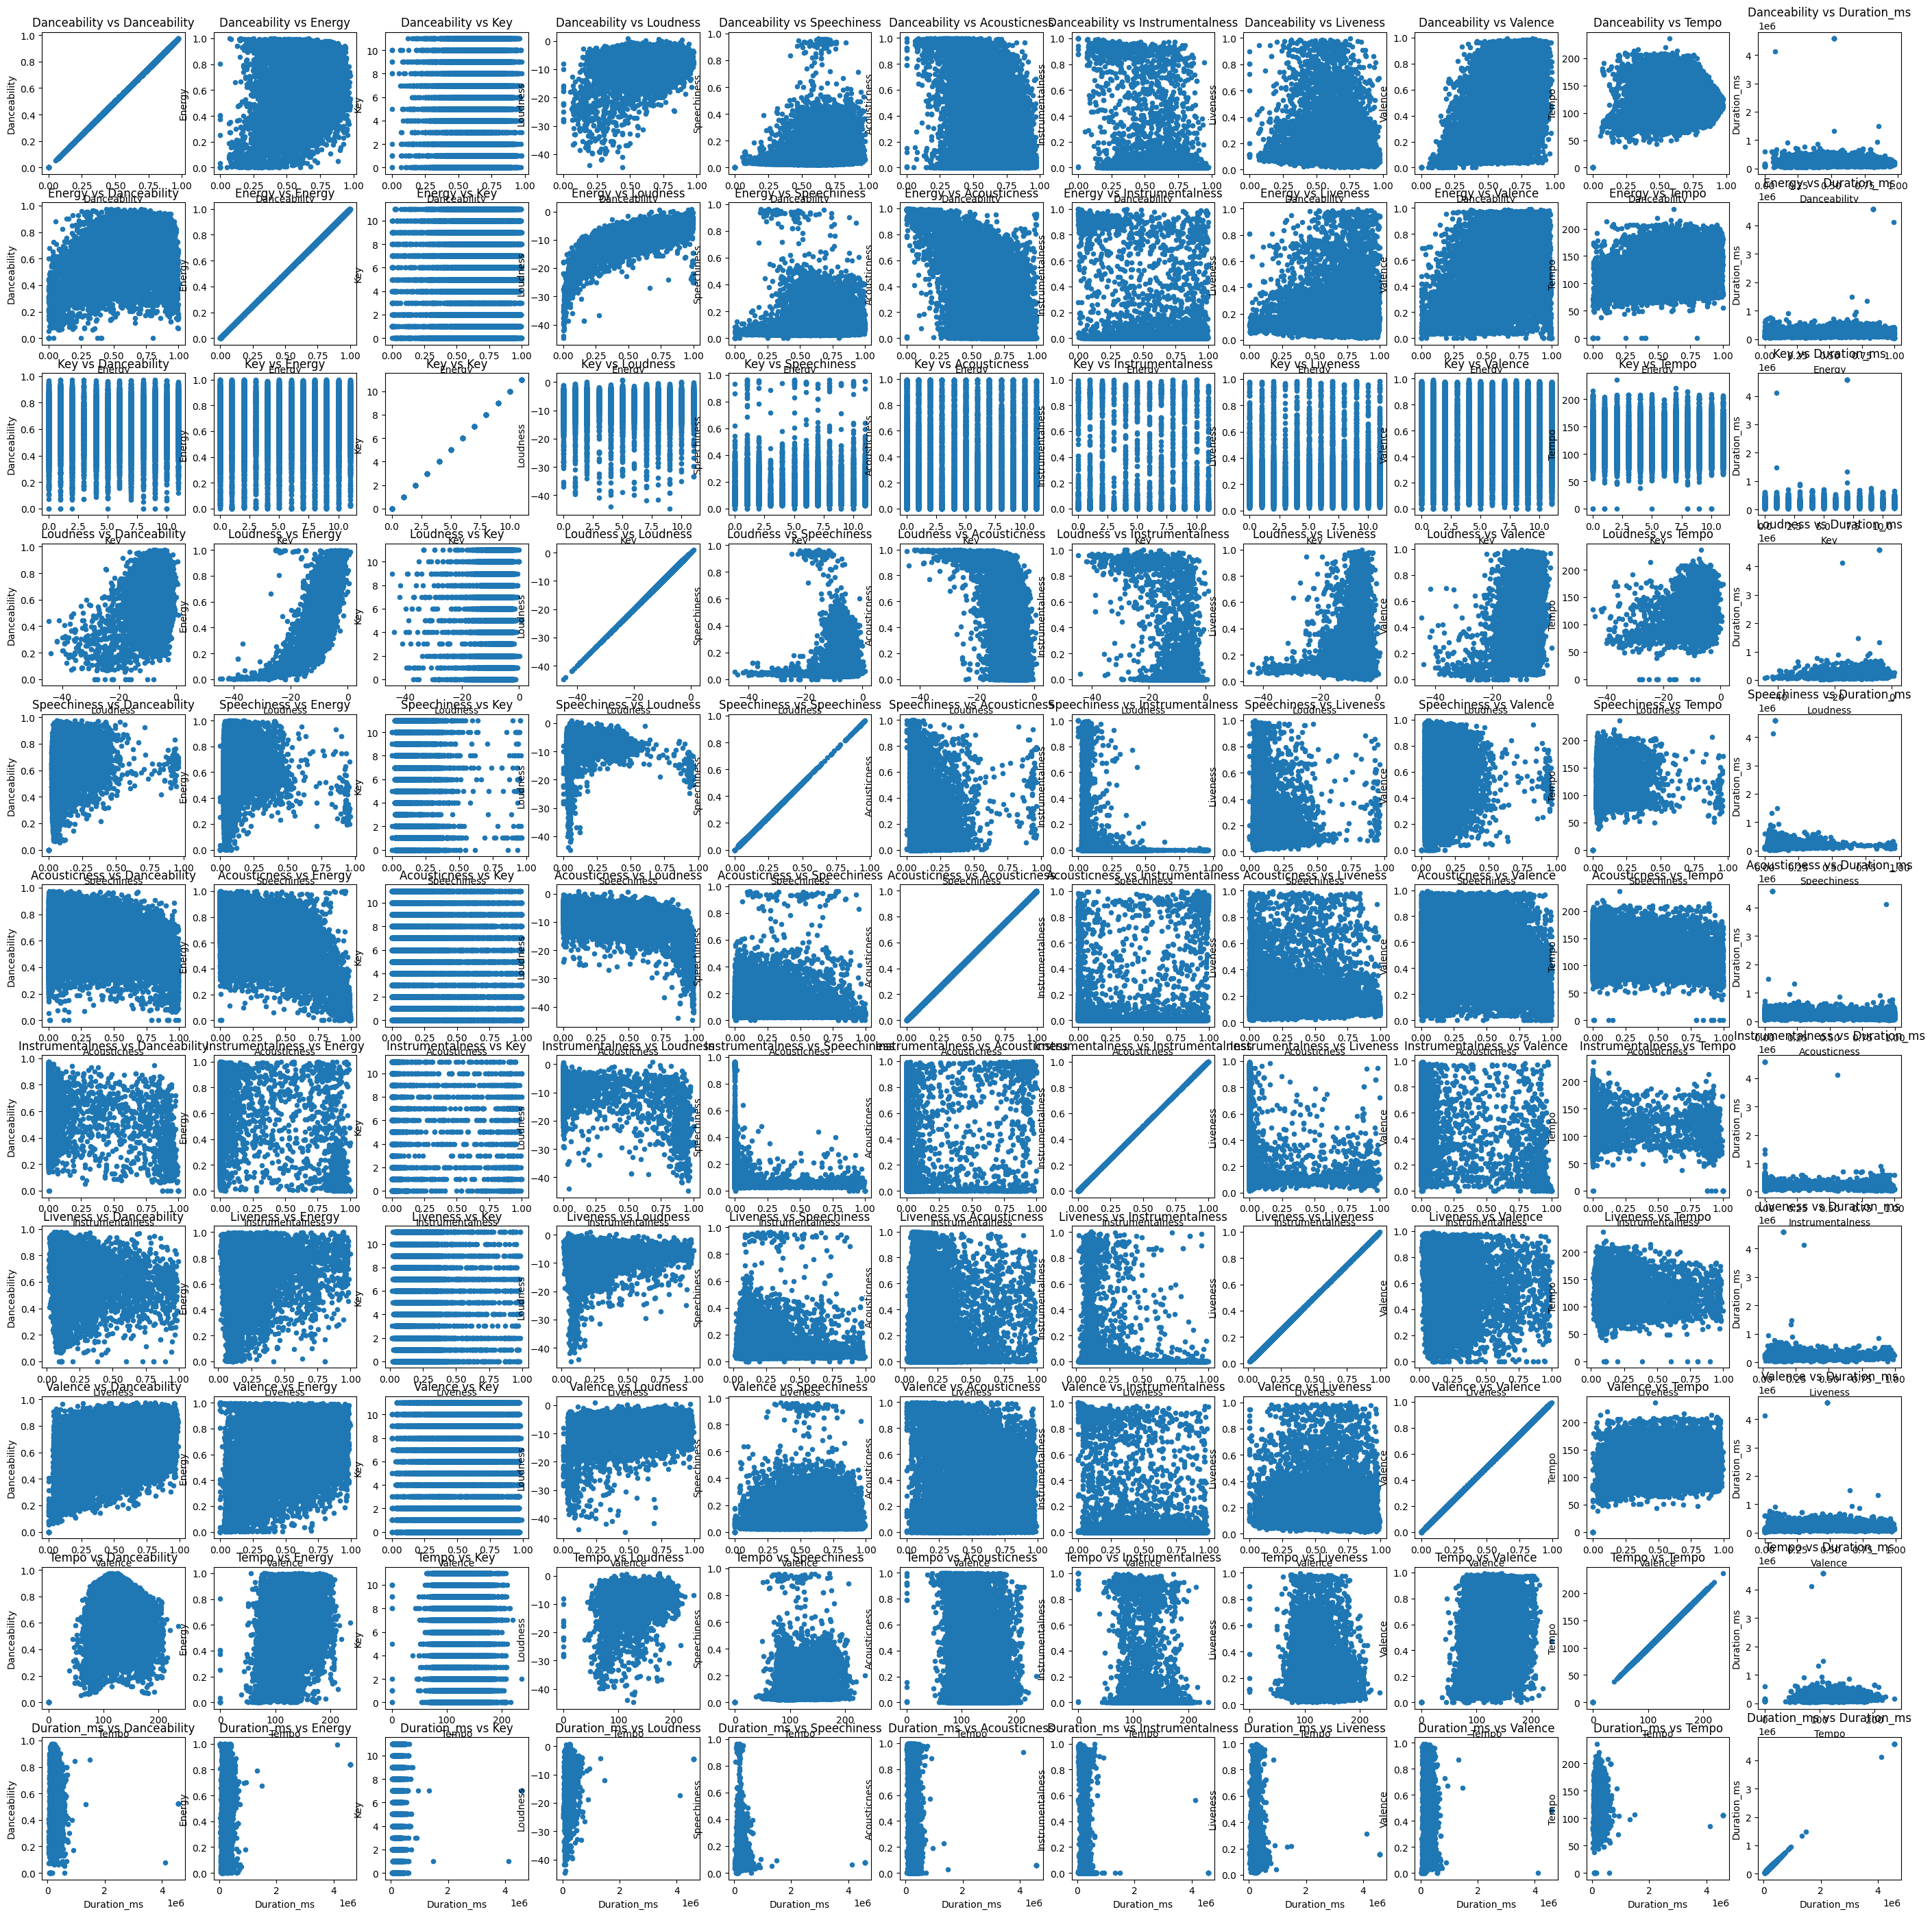

In [13]:
song_cols = [
    'Danceability',
    'Energy',
    'Key',
    'Loudness',
    'Speechiness',
    'Acousticness',
    'Instrumentalness',
    'Liveness',
    'Valence',
    'Tempo',
    'Duration_ms'
]

fig, axes = plt.subplots(len(song_cols), len(song_cols), figsize=(35, 35))

for i, col in enumerate(song_cols):
    for i2, col2 in enumerate(song_cols):
        train.plot(ax=axes[i, i2], x=col, y=col2, kind='scatter', title=f'{col} vs {col2}')
        axes[i, i2].set_xlabel(col)
        axes[i, i2].set_ylabel(col2)


(array([9.383e+03, 1.353e+03, 5.880e+02, 3.650e+02, 2.600e+02, 2.030e+02,
        1.090e+02, 1.210e+02, 8.600e+01, 5.600e+01, 5.400e+01, 4.300e+01,
        3.900e+01, 3.500e+01, 2.700e+01, 1.900e+01, 2.400e+01, 3.000e+01,
        1.300e+01, 1.100e+01, 1.300e+01, 7.000e+00, 8.000e+00, 9.000e+00,
        8.000e+00, 1.200e+01, 7.000e+00, 6.000e+00, 2.000e+00, 6.000e+00,
        1.000e+00, 0.000e+00, 5.000e+00, 8.000e+00, 6.000e+00, 4.000e+00,
        2.000e+00, 4.000e+00, 4.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 4.000e+00, 2.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 3.000e+00, 3.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

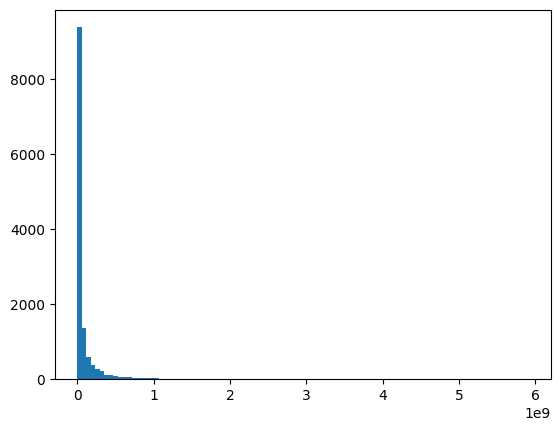

In [14]:
plt.hist(train['Views'], bins=100)

In [48]:
train['mean_views'] = train['Artist'].map(train.groupby('Artist')['Views'].mean())

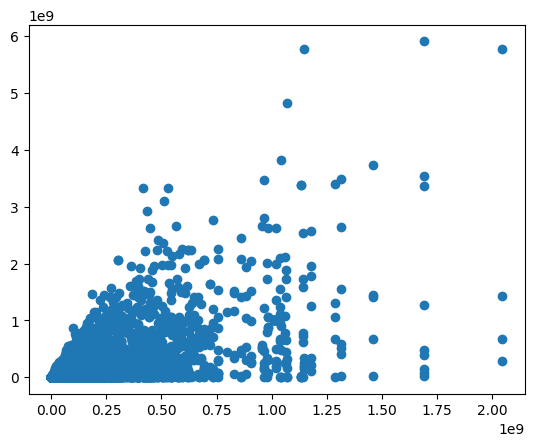

In [49]:
plt.scatter(train['mean_views'], train['Views'])

(array([ 43., 137., 120., 132., 162., 252., 190., 279., 341., 194., 271.,
        284., 288., 280., 332., 419., 276., 378., 334., 329., 239., 263.,
        216., 237., 209., 240., 286., 243., 195., 224., 242., 162., 243.,
        154., 227., 163., 182., 141., 135., 139., 148., 133., 121., 148.,
        132.,  74., 121., 142.,  88.,  93.,  95.,  74.,  56.,  74.,  71.,
         22.,  82.,  86.,  71.,  46.,  53.,  51.,  44.,  18.,  51.,  19.,
         24.,  26.,  70.,  43.,  43.,   9.,  11.,  13.,  36.,  16.,  13.,
         45.,  38.,  17.,  33.,  21.,  37.,  14.,  37.,   0.,  32.,   8.,
         28.,  14.,  23.,  22.,   8.,   7.,  22.,  16.,   8.,  14.,  15.,
         21.]),
 array([2.34946802e+01, 2.77782376e+02, 5.32070072e+02, 7.86357768e+02,
        1.04064546e+03, 1.29493316e+03, 1.54922086e+03, 1.80350855e+03,
        2.05779625e+03, 2.31208394e+03, 2.56637164e+03, 2.82065934e+03,
        3.07494703e+03, 3.32923473e+03, 3.58352242e+03, 3.83781012e+03,
        4.09209782e+03, 4.3463

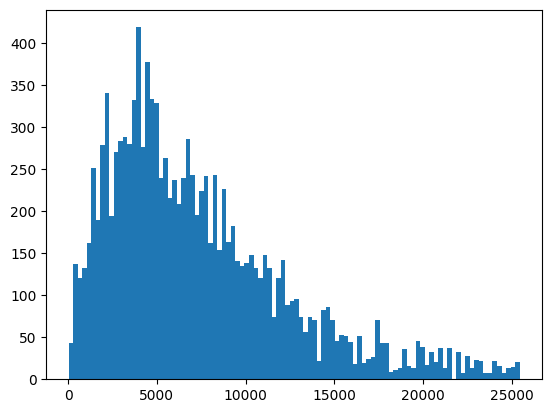

In [70]:
keeping_mean_views = np.sqrt(np.sort(train['mean_views'].to_numpy().squeeze()))

filter = keeping_mean_views[(keeping_mean_views < np.mean(keeping_mean_views) + 3 * np.std(keeping_mean_views)) & (keeping_mean_views > np.mean(keeping_mean_views) - 3 * np.std(keeping_mean_views))]



plt.hist(filter[0:int(1.0 * len(train['mean_views']))], bins=100)

In [62]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
pca.fit(train[song_cols])
pca.transform(train[song_cols])



array([[ 3.73928378e+04,  9.69721482e+00,  6.91319534e-01,
         2.69036319e+00, -3.44111871e-01],
       [ 2.60338378e+04,  6.07249201e+00, -6.69010753e+00,
         2.21176197e+00, -2.47632627e-01],
       [-1.20511623e+04,  3.64663361e+01,  1.63917506e+00,
         3.64187427e+00, -1.40702906e-01],
       ...,
       [ 1.25898376e+04,  4.47844928e+01, -3.79984743e+00,
        -4.99358708e+00, -2.68243876e-01],
       [ 7.49983777e+03,  2.15701055e+01,  2.19994287e+00,
        -1.41959745e+00, -1.26768762e-01],
       [-4.10201623e+04,  2.61809195e+01, -1.26944613e+00,
         8.40606916e-01, -2.91179359e-01]], shape=(12287, 5))

In [65]:
pca.explained_variance_ratio_

array([9.99999934e-01, 6.36127092e-08, 1.47320152e-09, 9.22125966e-10,
       4.79020654e-12])

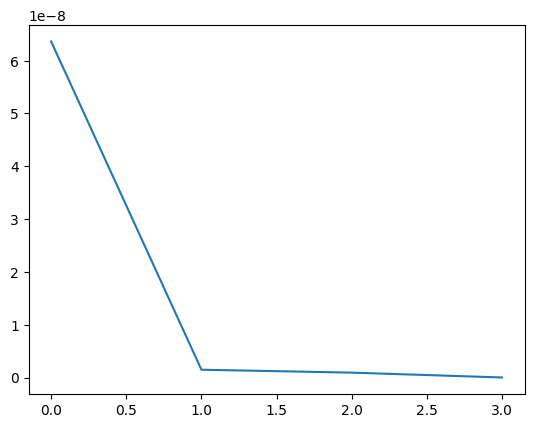

In [67]:
plt.plot([i for i in range(4)], pca.explained_variance_ratio_[1:])

In [73]:
np.expand_dims(filter, axis=1).shape

(12078, 1)

(array([ 43., 137., 120., 132., 162., 252., 190., 279., 341., 194., 271.,
        284., 288., 280., 332., 419., 276., 378., 334., 329., 239., 263.,
        216., 237., 209., 240., 286., 243., 195., 224., 242., 162., 243.,
        154., 227., 163., 182., 141., 135., 139., 148., 133., 121., 148.,
        132.,  74., 121., 142.,  88.,  93.,  95.,  74.,  56.,  74.,  71.,
         22.,  82.,  86.,  71.,  46.,  53.,  51.,  44.,  18.,  51.,  19.,
         24.,  26.,  70.,  43.,  43.,   9.,  11.,  13.,  36.,  16.,  13.,
         45.,  38.,  17.,  33.,  21.,  37.,  14.,  37.,   0.,  32.,   8.,
         28.,  14.,  23.,  22.,   8.,   7.,  22.,  16.,   8.,  14.,  15.,
         21.]),
 array([-0.97254244, -0.93235892, -0.89217541, -0.85199189, -0.81180837,
        -0.77162486, -0.73144134, -0.69125783, -0.65107431, -0.6108908 ,
        -0.57070728, -0.53052376, -0.49034025, -0.45015673, -0.40997322,
        -0.3697897 , -0.32960619, -0.28942267, -0.24923916, -0.20905564,
        -0.16887212, -0.12

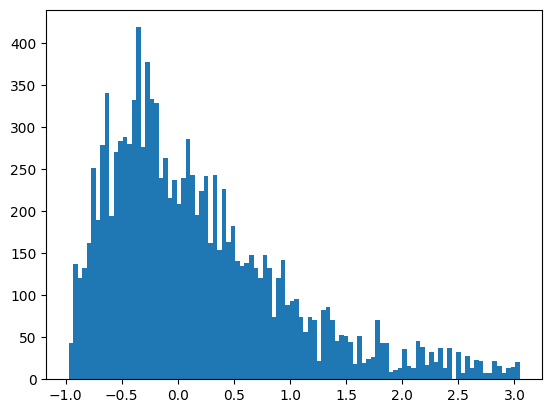

In [74]:

from sklearn.preprocessing import RobustScaler
rb_scaler = RobustScaler()

x = rb_scaler.fit_transform(np.expand_dims(filter, axis=1))

plt.hist(x, bins=100)
